## Project 3: Data Visualization from Project 1 and 2
### Stephen Koenig
### SDS 348
### 5/9/2021

In [7]:
# IMPORTANT
# Running this chunk lets you have multiple outputs from a single chunk; run it first!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Importing the Data

In [22]:
UN = pd.read_csv("UN.csv")
emissions = pd.read_csv("emissions.csv")
etidy = emissions.filter(['country', '2010'])
UN.head()
etidy.head()
#inner join
data = pd.merge(UN, etidy, on="country", how="left")
data.rename(columns={'2010': 'CO2'}, inplace=True)
datatemp = data.dropna()
datafinal = datatemp.filter(['country', 'region', 'fertility', 'ppgdp', 'CO2', 'lifeExpF', 'pctUrban', 'infantMortality'])
datafinal

,country,region,group,fertility,ppgdp,lifeExpF,pctUrban,infantMortality
0,Afghanistan,Asia,other,5.968,499.0,49.49,23.0,124.535000
1,Albania,Europe,other,1.525,3677.2,80.40,53.0,16.561000
2,Algeria,Africa,africa,2.142,4473.0,75.00,67.0,21.458000
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,11.293887
4,Angola,Africa,africa,5.135,4321.9,53.17,59.0,96.191000


,country,2010
0,Albania,2.08
1,Argentina,4.33
2,Armenia,1.92
3,Australia,17.30
4,Austria,11.60


,country,region,fertility,ppgdp,CO2,lifeExpF,pctUrban,infantMortality
1,Albania,Europe,1.525,3677.2,2.080,80.40,53.0,16.561
6,Argentina,Latin Amer,2.172,9162.1,4.330,79.89,93.0,12.337
7,Armenia,Asia,1.735,3030.7,1.920,77.33,64.0,24.272
9,Australia,Oceania,1.949,57118.9,17.300,84.27,89.0,4.455
10,Austria,Europe,1.346,45158.8,11.600,83.55,68.0,3.713
...,...,...,...,...,...,...,...,...
198,Ukraine,Europe,1.483,3035.0,5.390,74.58,69.0,11.822
203,Uruguay,Latin Amer,2.043,11952.4,3.020,80.66,93.0,11.754
206,Venezuela,Latin Amer,2.391,13502.7,5.860,77.73,94.0,15.278
211,Zambia,Africa,6.300,1237.8,0.418,50.04,36.0,80.956


#### 2. Descriptions

This data has 96 rows and 8 columns. Each row represents one country's data, and the data collected are the columns: country name, region, fertility rate, ppgdp, CO2 emissions per person in tonnes, Life expectancy for a female, percent urban, and infant mortality rate.

#### 3. Exploratory Data Analysis

In [23]:
datafinal.describe()

,fertility,ppgdp,CO2,lifeExpF,pctUrban,infantMortality
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2.525677,16114.045833,6.341846,74.235729,61.708333,24.541031
std,1.235034,21192.417002,7.324861,9.543525,21.762313,24.796200
min,1.284000,324.600000,0.057200,50.040000,13.000000,1.916000
25%,1.555750,2014.125000,1.160000,70.185000,47.250000,5.209500
50%,2.152500,6293.950000,4.300000,76.975000,63.500000,16.616000
75%,2.894000,21855.650000,9.280000,81.562500,77.250000,32.789000
max,6.300000,105095.400000,47.900000,87.120000,100.000000,92.870000


<AxesSubplot:ylabel='region'>

count         96
unique         7
top       Europe
freq          29
Name: region, dtype: object

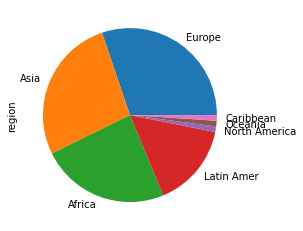

In [33]:
datafinal['region'].value_counts().plot.pie()
datafinal.region.describe()

There are 7 unique regions represented in the dataset, with the most common region being Europe, with 29 of the 96 countries located in Europe. North America only has one reported country, which is surprising since the country in the data is not America, but Canada.

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 0, 'Life Expectancy (Female)')

count    96.000000
mean     74.235729
std       9.543525
min      50.040000
25%      70.185000
50%      76.975000
75%      81.562500
max      87.120000
Name: lifeExpF, dtype: float64

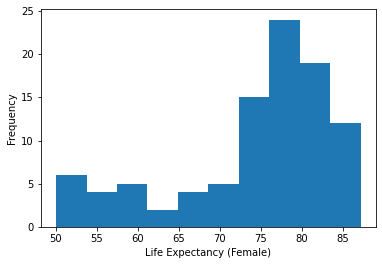

In [36]:
datafinal['lifeExpF'].plot(kind="hist")
plt.xlabel('Life Expectancy (Female)')
datafinal.lifeExpF.describe()

The histogram for life expectancy of females across all countries in the dataset show a left skewed distribution, with a peak around 76 years, and a minimum of 50 years. There are a few countries that have low life expectancies that are below 70, but the majority of the data falls in the 75 to 85 year range.